<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/practice/HOML_Housing_Price_Median_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the data

In [1]:
import urllib
import os
import tarfile

download_url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz'


def get_data(url, file_name):
  urllib.request.urlretrieve(download_url, file_name)
  housing_tgz = tarfile.open(file_name)
  housing_tgz.extractall(path='.')
  housing_tgz.close()

get_data(download_url, 'housing.tgz')



In [ ]:
!ls -ltr

total 1796
-rw-r--r-- 1  501 staff 1423529 May  3  2016 housing.csv
drwxr-xr-x 1 root root     4096 Dec  4 14:23 sample_data
-rw-r--r-- 1 root root   409488 Dec  6 02:20 housing.tgz


# Read Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def get_housing_df(path):
  return pd.read_csv(path)

housing_df = get_housing_df('housing.csv')

In [ ]:
housing_df.shape

(20640, 10)

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
housing_df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Visualizing Data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

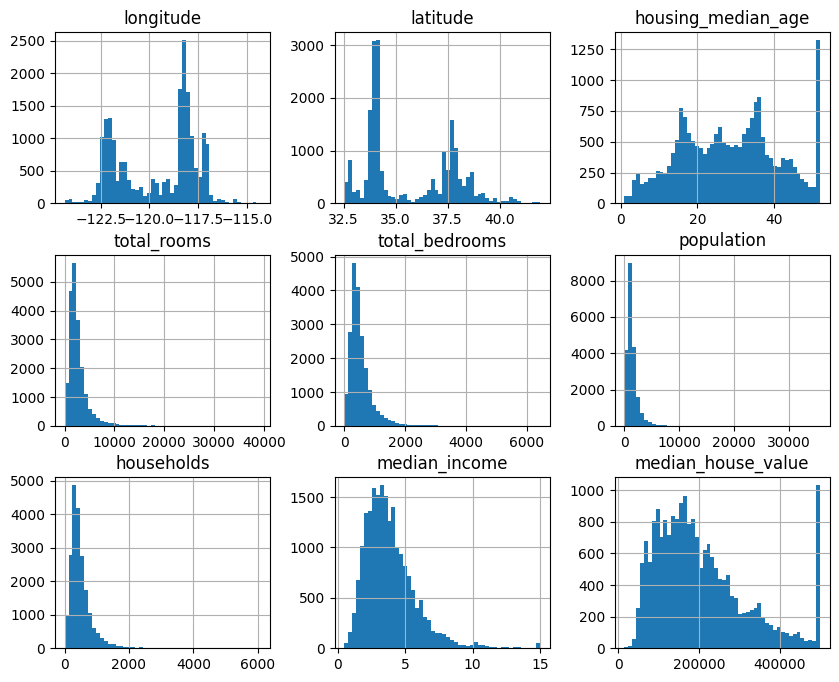

In [ ]:
%matplotlib inline

housing_df.hist(bins=50, figsize=(10,8))

# Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(housing_df, test_size=0.2, random_state=2024)

In [ ]:
train.shape

(16512, 10)

In [ ]:
test.shape

(4128, 10)

Above one is random sampling. Lets stratify this on mediaum income category

In [6]:
housing_df['income_cat'] = pd.cut(
    housing_df['median_income'],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

<Axes: >

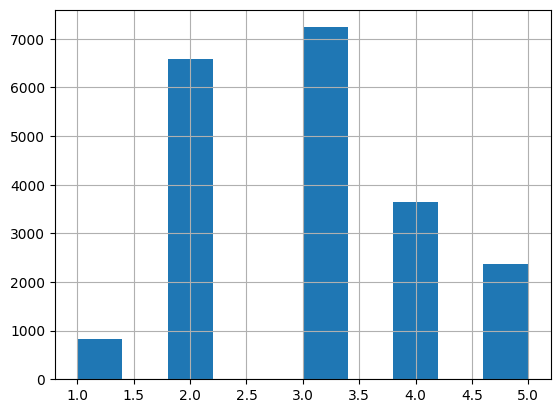

In [ ]:
housing_df['income_cat'].hist()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.20, random_state = 2024)
for train_index, test_index in split.split(housing_df, housing_df['income_cat']):
  strat_train = housing_df.loc[train_index]
  strat_test = housing_df.loc[test_index]

In [ ]:
strat_test['income_cat'].value_counts() / len(strat_test)

In [ ]:
strat_train['income_cat'].value_counts() / len(strat_train)

,count
income_cat,
3,0.350594
2,0.318859
4,0.176296
5,0.114462
1,0.039789


In [ ]:
housing_df['income_cat'].value_counts() / len(housing_df)

,count
income_cat,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


In [ ]:
strat_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
1982,-120.81,38.67,14.0,8396.0,1578.0,3952.0,1474.0,3.0565,118800.0,INLAND,3
5432,-118.41,34.02,19.0,4702.0,1472.0,2636.0,1334.0,3.3955,225000.0,<1H OCEAN,3
5456,-118.47,34.00,38.0,1235.0,390.0,891.0,376.0,2.7143,287500.0,<1H OCEAN,2
18036,-121.91,37.23,22.0,2614.0,453.0,1240.0,462.0,6.0712,271800.0,<1H OCEAN,5
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0,<1H OCEAN,2


In [ ]:
for d in(strat_train,strat_test):
  d.drop('income_cat', axis = 1, inplace=True) # as our job is done

In [ ]:
strat_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1982 to 6579
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16334 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


# EDA

## Scatter Plot

<Axes: xlabel='longitude', ylabel='latitude'>

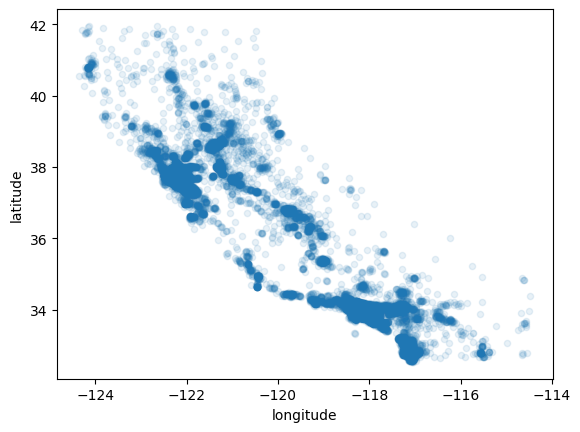

In [ ]:
strat_train.plot(kind = 'scatter', x='longitude', y = 'latitude', alpha = 0.1)

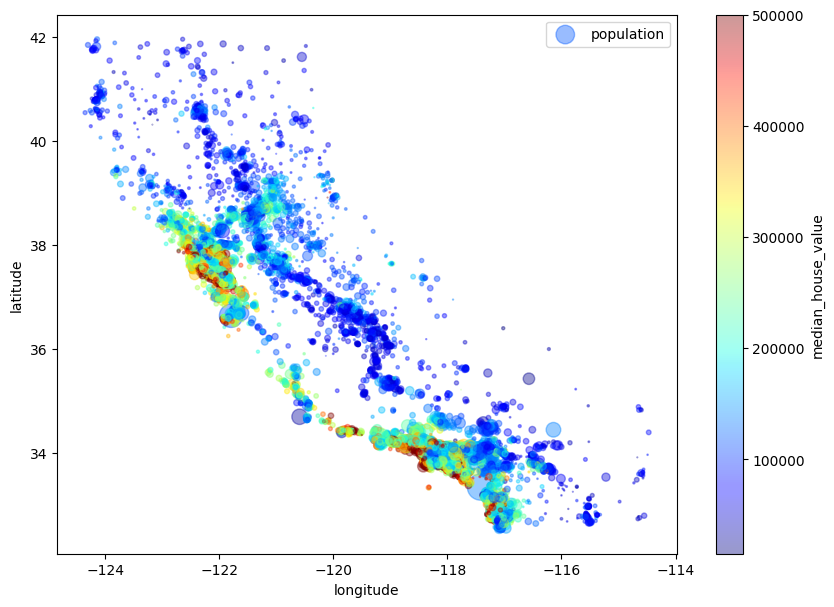

In [ ]:
strat_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=strat_train["population"]/100, label="population", figsize=(10,7),
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    )
plt.legend()

##  Calculate Corr

In [ ]:
corr_mat = strat_train.corr(numeric_only=True)

In [ ]:
corr_mat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924627,-0.107806,0.037480,0.063632,0.095142,0.050442,-0.020484,-0.049377
latitude,-0.924627,1.000000,0.009459,-0.030950,-0.063243,-0.105368,-0.068139,-0.074726,-0.141364
housing_median_age,-0.107806,0.009459,1.000000,-0.356166,-0.315738,-0.291043,-0.298101,-0.115976,0.109617
total_rooms,0.037480,-0.030950,-0.356166,1.000000,0.929295,0.855260,0.918717,0.203042,0.139834
total_bedrooms,0.063632,-0.063243,-0.315738,0.929295,1.000000,0.874361,0.979604,-0.004603,0.055791
population,0.095142,-0.105368,-0.291043,0.855260,0.874361,1.000000,0.904441,0.007378,-0.020318
households,0.050442,-0.068139,-0.298101,0.918717,0.979604,0.904441,1.000000,0.016968,0.072055
median_income,-0.020484,-0.074726,-0.115976,0.203042,-0.004603,0.007378,0.016968,1.000000,0.686178
median_house_value,-0.049377,-0.141364,0.109617,0.139834,0.055791,-0.020318,0.072055,0.686178,1.000000


<Axes: >

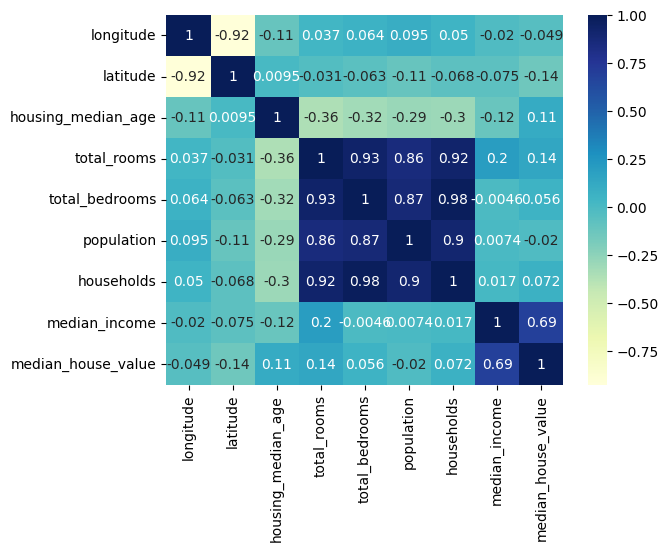

In [ ]:
import seaborn as sb

sb.heatmap(corr_mat, cmap="YlGnBu", annot=True)

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

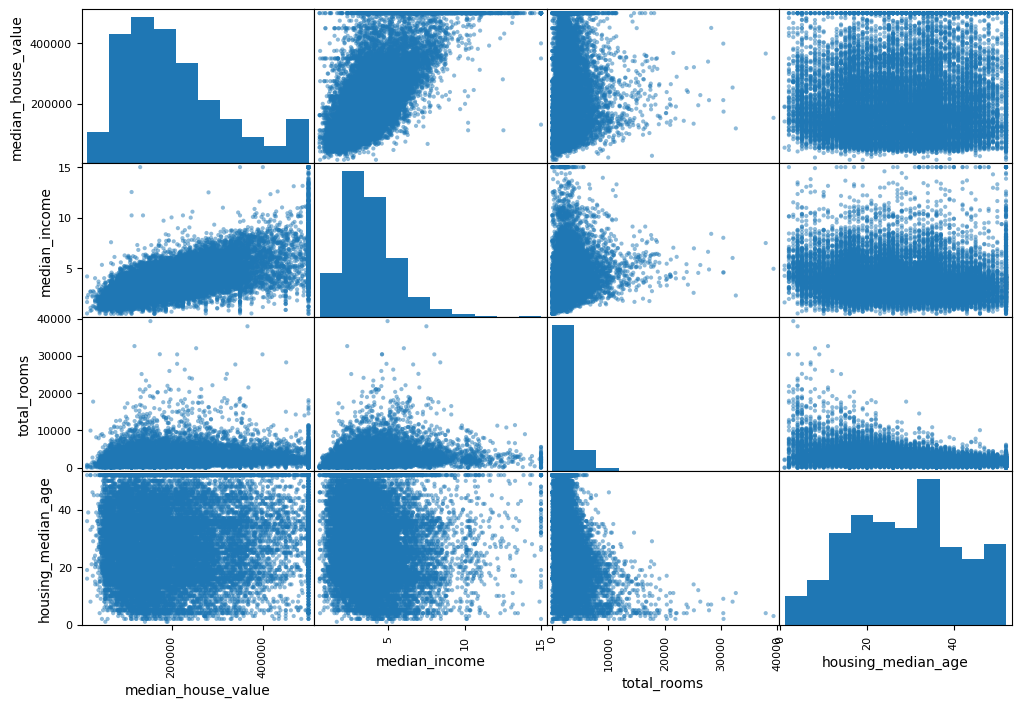

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
                  "housing_median_age"]

scatter_matrix(housing_df[attributes] , figsize=(12,8))

# Create New Features

In [ ]:
housing_df['rooms_per_household'] = housing_df['total_rooms'] / housing_df['households']
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms'] / housing_df['total_rooms']
housing_df['population_per_household'] = housing_df['population'] / housing_df['households']

<Axes: >

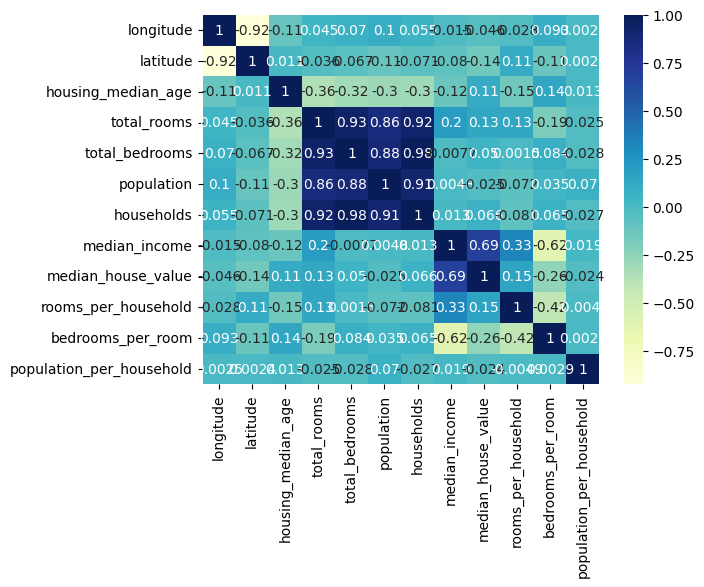

In [ ]:
sb.heatmap(housing_df.corr(numeric_only=True) , cmap="YlGnBu", annot=True)

In [ ]:
housing_df.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650
longitude,-0.045967


# Prep The data for ML

In [8]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [10]:
housing = strat_train.drop("median_house_value" , axis=1)
housing_labels = strat_train["median_house_value"]

## Data Cleaning

In [12]:
housing.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,178
population,0
households,0
median_income,0
ocean_proximity,0
income_cat,0


total_bedrooms columns has missing values. Lets fix it by eother of following ways.

1. Remove those rows
2. Remove that column
3. Set some approx values (mean , meadian, mode etc)

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

housing_numeric = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_numeric)
imputer.statistics_

array([-118.49   ,   34.25   ,   29.     , 2130.     ,  435.     ,
       1166.5    ,  409.     ,    3.53965,    3.     ])

In [16]:
housing_numeric['total_rooms'].median() # it should be same as what imputer gave

2130.0

In [19]:
X = imputer.transform(housing_numeric)

housing_training = pd.DataFrame(X, columns = housing_numeric.columns, index=housing_numeric.index)
housing_training.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
income_cat,0


In [20]:
housing_training.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
1982,-120.81,38.67,14.0,8396.0,1578.0,3952.0,1474.0,3.0565,3.0
5432,-118.41,34.02,19.0,4702.0,1472.0,2636.0,1334.0,3.3955,3.0
5456,-118.47,34.00,38.0,1235.0,390.0,891.0,376.0,2.7143,2.0
18036,-121.91,37.23,22.0,2614.0,453.0,1240.0,462.0,6.0712,5.0
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,2.0


In [25]:
housing_categorical = housing[['ocean_proximity']]
housing_categorical.value_counts()

,count
ocean_proximity,
<1H OCEAN,7320
INLAND,5235
NEAR OCEAN,2129
NEAR BAY,1825
ISLAND,3


In [26]:
housing['ocean_proximity'].unique()

array(['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

## Ordinal Encoder

In [28]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
housing_categorical_enc = oe.fit_transform(housing_categorical)
housing_categorical_enc

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [29]:
oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## OneHotEncoder

In [31]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
housing_categorical_1hot = ohe.fit_transform(housing_categorical)
housing_categorical_1hot.toarray()


array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [39]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Calculate VIF (To check dummy variable trap)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

test = housing_categorical_1hot.toarray()
[variance_inflation_factor(test, i) for i in range(test.shape[1])]

[1.0, 1.0, 1.0, 1.0, 1.0]

## Transformation Pipelines

In [40]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
    ])
numeric_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

## User ColumnTransformer for all sort of transformations

In [41]:
list(housing_numeric)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'income_cat']

In [42]:
from sklearn.compose import ColumnTransformer


num_features = list(housing_numeric)
cat_features = ['ocean_proximity']

ct_pipeline = ColumnTransformer(
    [
        ("num", numeric_pipeline, num_features),
        ("cat", OneHotEncoder(), cat_features)
    ]
)

housing_transformed = ct_pipeline.fit_transform(housing)

In [43]:
housing_transformed

array([[-0.62171155,  1.4241499 , -1.1609397 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57710328, -0.75203623, -0.76401094, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54713291, -0.76139617,  0.74431835, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.1911486 ,  0.75959413,  0.42677534, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18615354,  0.83915363, -1.0021682 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.68699464, -0.66779677,  0.98247561, ...,  0.        ,
         0.        ,  0.        ]])

# Training Model